Our data: read the Iowa data file into a Pandas DataFrame called `home_data`.

In [113]:
import pandas as pd

# Path of the file to read
iowa_file_path = './train.csv'
home_data = pd.read_csv(iowa_file_path)

## Goal: 

In [101]:
Y = home_data.SalePrice
Y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

## Summary stats

In [99]:
home_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [34]:
# average lot size 
avg_lot_size = int(round(home_data["LotArea"].mean()))
avg_lot_size

10517

In [35]:
# As of today, how old is the newest home
newest_home_age = 2018 - home_data["YearBuilt"].max()
newest_home_age

8

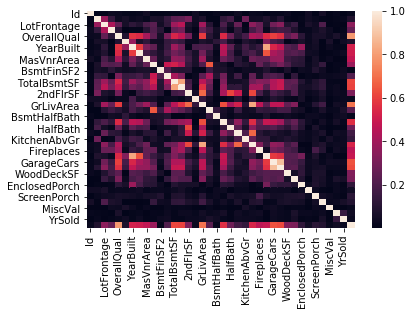

In [110]:
import seaborn as sns
c = home_data.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False).drop_duplicates()
sns.heatmap(c)

## Features

In [96]:
home_features = ['GrLivArea', 'YearBuilt', 'FullBath', '2ndFlrSF', 'BedroomAbvGr', "OverallQual", "GarageCars" ]

X = home_data[home_features]
X.head()

,GrLivArea,YearBuilt,FullBath,2ndFlrSF,BedroomAbvGr,OverallQual,GarageCars
0,1710,2003,2,854,3,7,2
1,1262,1976,2,0,3,6,2
2,1786,2001,2,866,3,7,2
3,1717,1915,1,756,3,7,3
4,2198,2000,2,1053,4,8,3


## Train & Test sets

In [97]:
from sklearn.model_selection import train_test_split

# split data into training and validation data
train_X, val_X, train_y, val_y = train_test_split(X, Y, random_state = 0)
print(train_X.shape, val_X.shape, train_y.shape, val_y.shape)

(1095, 7) (365, 7) (1095,) (365,)


## Model

In [98]:
from sklearn.tree import DecisionTreeRegressor

# the model
house_model = DecisionTreeRegressor(random_state=1)

# Fit model
house_model.fit(train_X, train_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [99]:
from sklearn.metrics import mean_absolute_error

val_predictions = house_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

23529.254794520548
